In [214]:
import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder


from scipy import stats

In [215]:
df1 = pd.read_csv("D:\C-DBDA Data\projects\Flight Price Prediction\Flight-Price-Analysis-and-Prediction\Flight Data 1.csv")

In [216]:
df2 = pd.read_csv("D:\C-DBDA Data\projects\Flight Price Prediction\Flight-Price-Analysis-and-Prediction\Flight Data 2.csv")

In [217]:
df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [218]:
df2

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [219]:
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')
Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')


In [220]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [221]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [222]:
df1.flight


0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object

In [223]:
df2.Flight_code

0         SG-8169
1         6E-2519
2          G8-354
3         SG-8709
4          AI-805
           ...   
452083     UK-926
452084     UK-918
452085     UK-918
452086     UK-946
452087     UK-946
Name: Flight_code, Length: 452088, dtype: object

In [224]:
Flight_codes1  = df1.flight
pd.DataFrame(Flight_codes1)
Flight_codes2  = df2.Flight_code
pd.DataFrame(Flight_codes2)

,Flight_code
0,SG-8169
1,6E-2519
2,G8-354
3,SG-8709
4,AI-805
...,...
452083,UK-926
452084,UK-918
452085,UK-918
452086,UK-946


In [225]:
Flight_codes1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
300148     True
300149     True
300150     True
300151     True
300152     True
Name: flight, Length: 300153, dtype: bool

In [226]:
Flight_codes2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
452083     True
452084     True
452085     True
452086     True
452087     True
Name: Flight_code, Length: 452088, dtype: bool

In [227]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [228]:
df2

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [229]:
df2.drop(columns=['Date_of_journey','Journey_day'],inplace=True)

In [230]:
df2.shape

(452088, 11)

In [231]:
df1.shape

(300153, 11)

In [232]:
print(df1.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [233]:
print(df2.columns)

Index(['Airline', 'Flight_code', 'Class', 'Source', 'Departure', 'Total_stops',
       'Arrival', 'Destination', 'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')


In [234]:
df2.rename(columns={'Airline':'airline','Flight_code':'flight','Class':'class','Source':'source_city','Departure':'departure_time','Total_stops':'stops','Arrival':'arrival_time','Destination':'destination_city','Duration_in_hours':'duration','Days_left':'days_left','Fare':'price'},inplace=True)

In [235]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [236]:
df2

,airline,flight,class,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
452083,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [237]:
df2.departure_time.value_counts()

6 AM - 12 PM    184980
After 6 PM      127969
12 PM - 6 PM    115774
Before 6 AM      23365
Name: departure_time, dtype: int64

In [238]:
df1.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [239]:
df1.arrival_time = np.where(df1['arrival_time'] =='Morning','6 AM - 12 PM', df1['arrival_time'])

df1.arrival_time = np.where(df1['arrival_time'] =='Early_Morning','Before 6 AM ', df1['arrival_time'])

df1.arrival_time = np.where(df1['arrival_time'] =='Evening','After 6 PM', df1['arrival_time'])

df1.arrival_time = np.where(df1['arrival_time'] =='Night','After 6 PM', df1['arrival_time'])

df1.arrival_time = np.where(df1['arrival_time'] =='Late_Night','After 6 PM', df1['arrival_time'])

df1.arrival_time = np.where(df1['arrival_time'] =='Afternoon','12 PM - 6 PM', df1['arrival_time'])

In [240]:
df1.departure_time = np.where(df1['departure_time'] =='Morning','6 AM - 12 PM', df1['departure_time'])

df1.departure_time = np.where(df1['departure_time'] =='Early_Morning','Before 6 AM ', df1['departure_time'])

df1.departure_time = np.where(df1['departure_time'] =='Evening','After 6 PM', df1['departure_time'])

df1.departure_time = np.where(df1['departure_time'] =='Night','After 6 PM', df1['departure_time'])

df1.departure_time = np.where(df1['departure_time'] =='Late_Night','After 6 PM', df1['departure_time'])

df1.departure_time = np.where(df1['departure_time'] =='Afternoon','12 PM - 6 PM', df1['departure_time'])

In [241]:
df1.departure_time.value_counts()

After 6 PM      114423
6 AM - 12 PM     71146
Before 6 AM      66790
12 PM - 6 PM     47794
Name: departure_time, dtype: int64

In [242]:
df1.arrival_time.value_counts()

After 6 PM      183862
6 AM - 12 PM     62735
12 PM - 6 PM     38139
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [243]:
df2.stops.value_counts()

1-stop      369650
non-stop     51755
2+-stop      30683
Name: stops, dtype: int64

In [244]:
df1.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [245]:
df2.stops = np.where(df2['stops']=='non-stop','zero',df2['stops'])
df2.stops = np.where(df2['stops']=='1-stop','one',df2['stops'])
df2.stops = np.where(df2['stops']=='two_or_more','one',df2['stops'])

In [246]:
df1['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [247]:
df2['class'].value_counts()

Economy            252033
Business           126834
Premium Economy     73077
First                 144
Name: class, dtype: int64

In [248]:
df2['class'] = np.where(df2['class']=='Premium Economy','Economy',df2['class'])
df2['class'] = np.where(df2['class']=='First','Business',df2['class'])

In [249]:
df2['class'].value_counts()

Economy     325110
Business    126978
Name: class, dtype: int64

In [250]:
df1['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [251]:
merged = pd.concat([df1,df2],axis=0)

In [252]:
merged.shape

(752241, 11)

In [253]:
merged

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,After 6 PM,zero,After 6 PM,Mumbai,Economy,2.1700,1,5953
1,SpiceJet,SG-8157,Delhi,Before 6 AM,zero,6 AM - 12 PM,Mumbai,Economy,2.3300,1,5953
2,AirAsia,I5-764,Delhi,Before 6 AM,zero,Before 6 AM,Mumbai,Economy,2.1700,1,5956
3,Vistara,UK-995,Delhi,6 AM - 12 PM,zero,12 PM - 6 PM,Mumbai,Economy,2.2500,1,5955
4,Vistara,UK-963,Delhi,6 AM - 12 PM,zero,6 AM - 12 PM,Mumbai,Economy,2.3300,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
452083,Vistara,UK-926,Ahmedabad,6 AM - 12 PM,one,After 6 PM,Chennai,Business,13.0833,50,65028
452084,Vistara,UK-918,Ahmedabad,Before 6 AM,one,12 PM - 6 PM,Chennai,Business,11.2500,50,69254
452085,Vistara,UK-918,Ahmedabad,Before 6 AM,one,12 PM - 6 PM,Chennai,Business,11.2500,50,69254
452086,Vistara,UK-946,Ahmedabad,6 AM - 12 PM,one,After 6 PM,Chennai,Business,11.1667,50,72980


In [254]:
merged['class'].value_counts()

Economy     531776
Business    220465
Name: class, dtype: int64

In [255]:
merged.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,752241,752241,752241,752241,752241,752241,752241,752241,752241.000000,752241.000000,752241.000000
unique,11,2203,7,5,4,5,7,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,6 AM - 12 PM,one,After 6 PM,Mumbai,Economy,NaN,NaN,NaN
freq,359349,8478,144496,256126,620513,384128,142092,531776,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.298068,25.778269,22061.852260
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.337123,14.011532,21315.101084
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.666700,14.000000,6489.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.330000,26.000000,11817.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.333300,38.000000,39377.000000


<Axes: xlabel='price'>

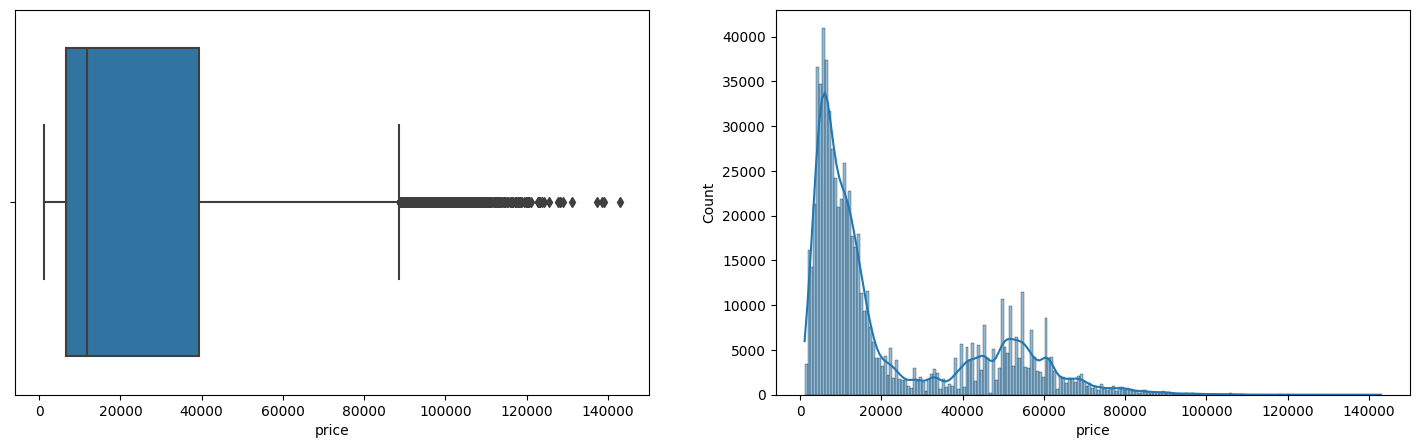

In [256]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = merged, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = merged)

Text(0.5, 1.0, 'Airline prices based on the class and company')

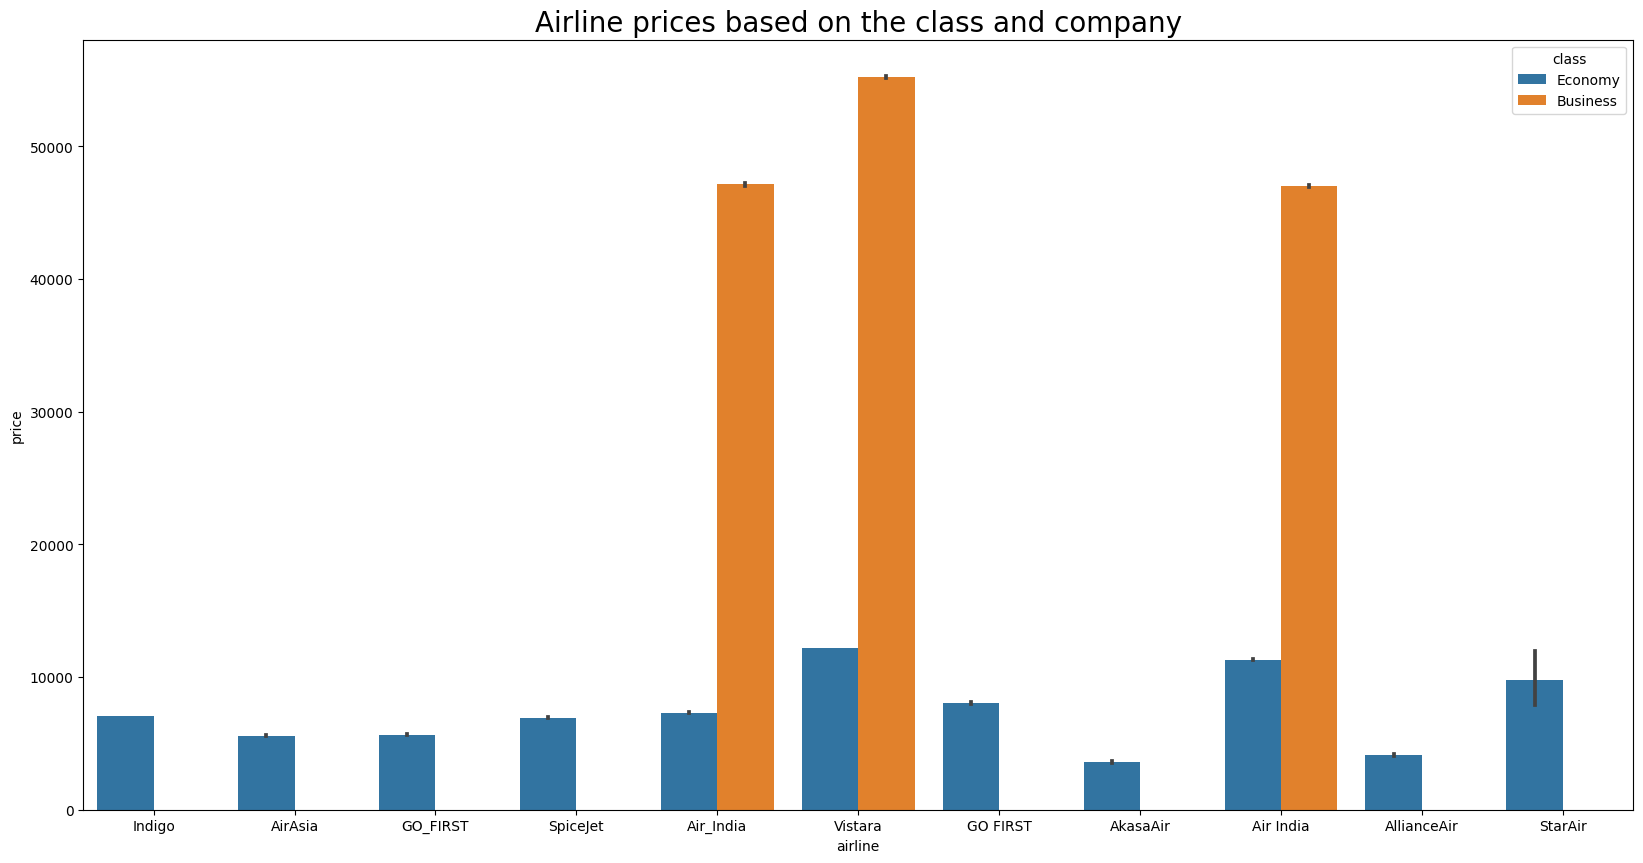

In [257]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=merged.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

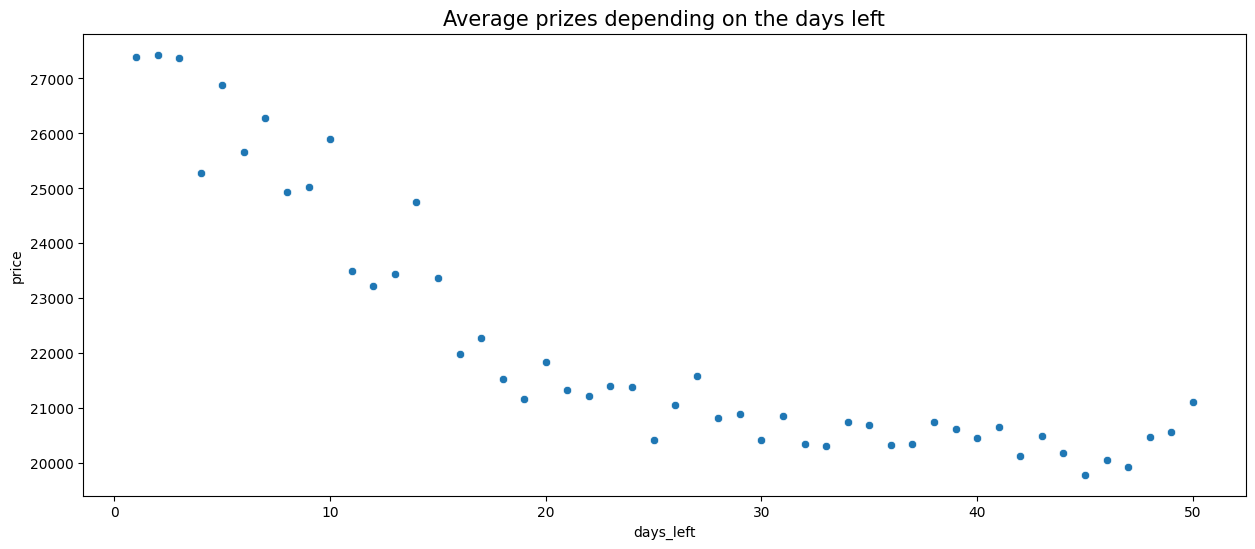

In [258]:
df_temp = merged.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

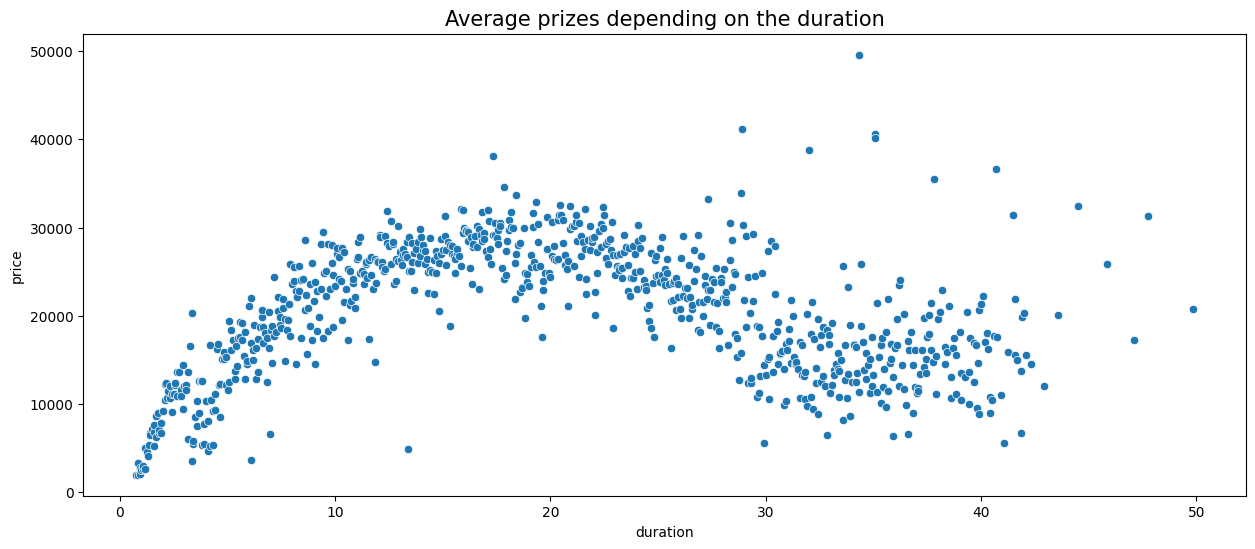

In [259]:
df_temp = merged.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

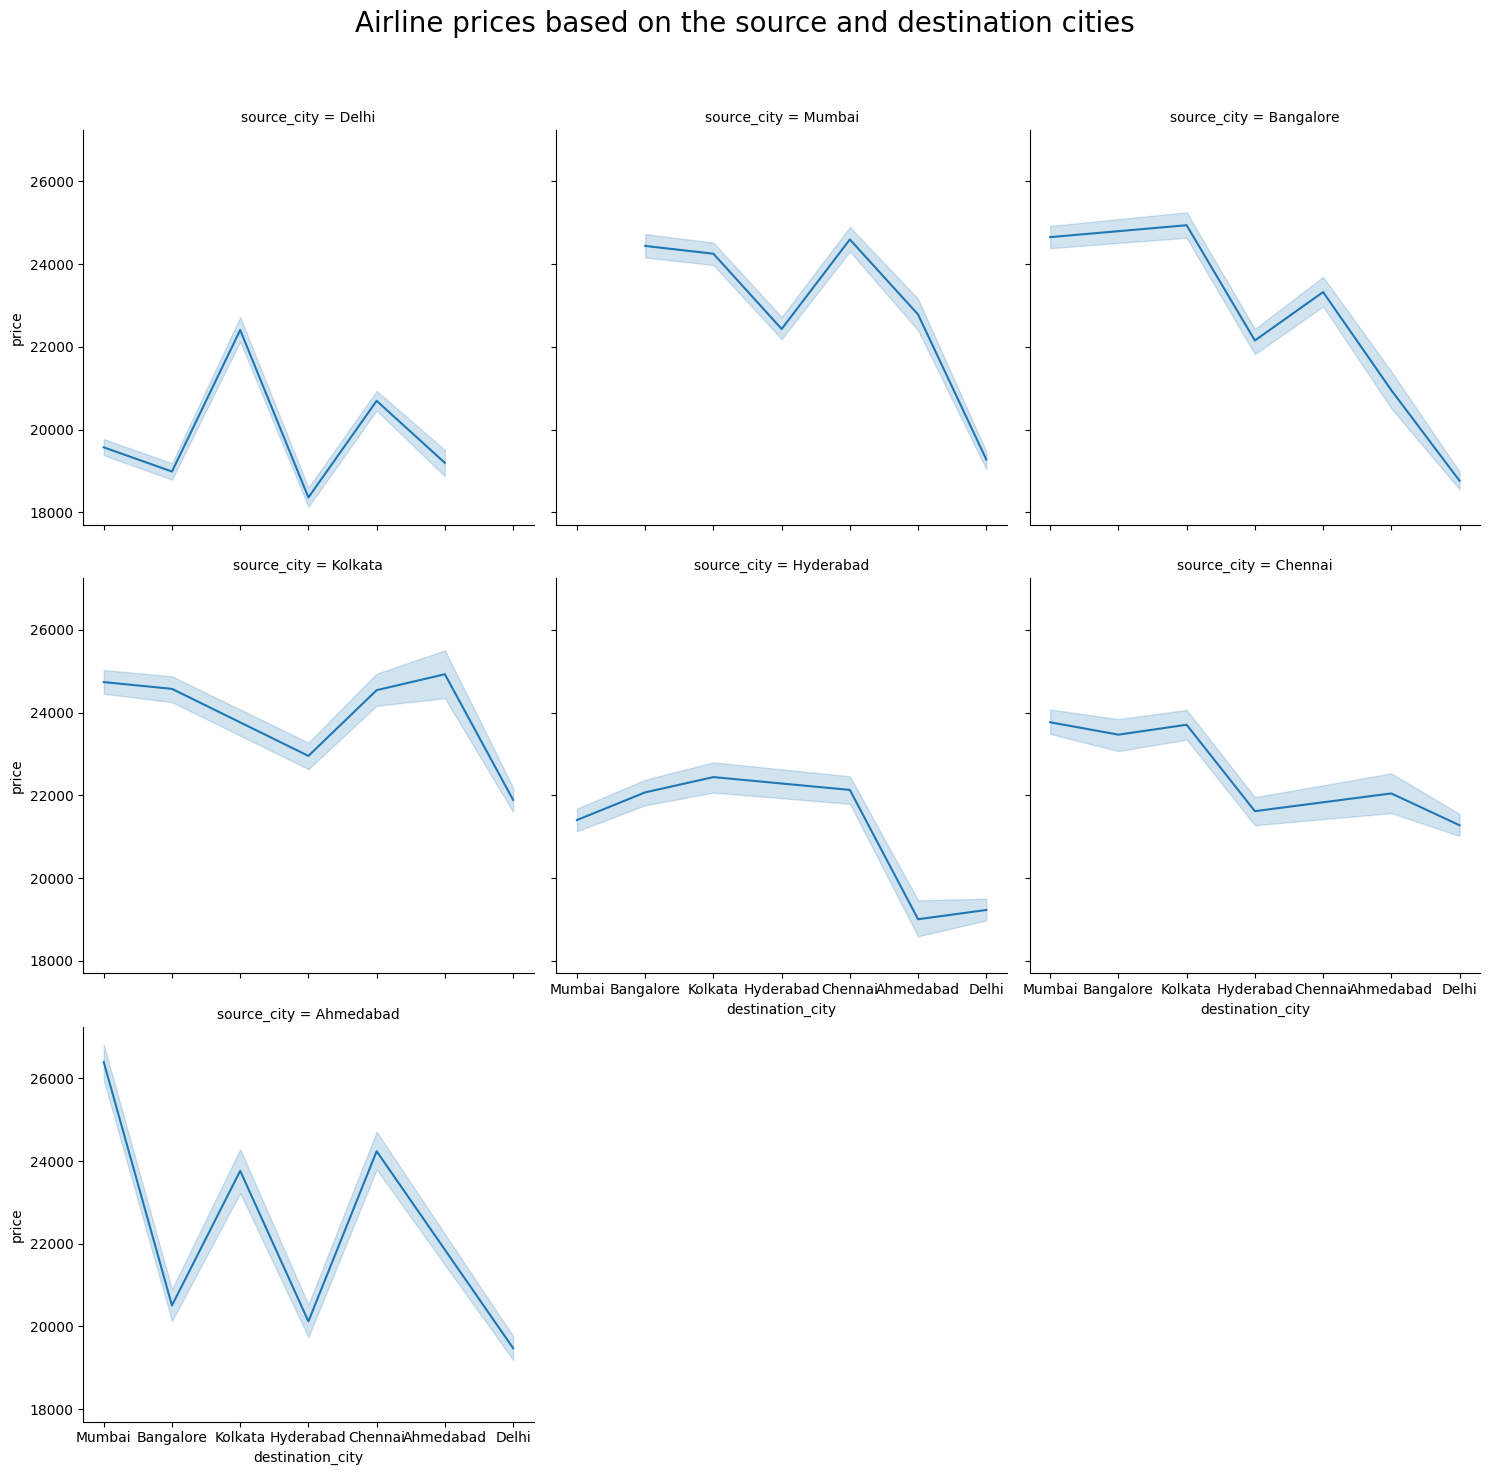

In [260]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=merged, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

In [261]:
def preprocessing(merged):
    #Encode the ordinal variables "stops" and "class".
    merged["stops"] = merged["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    merged["class"] = merged["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(merged[dummies_variables], drop_first= True)
    merged = pd.concat([merged,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    merged = merged.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return merged

In [266]:
df_preprocessed = preprocessing(merged)


ValueError: invalid literal for int() with base 10: '2+-stop'